In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

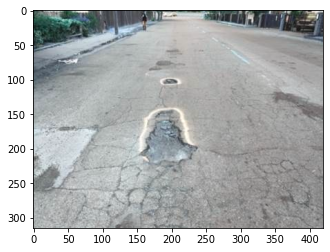

In [41]:
#checking images
plt.imshow(cv2.imread("pothole_dataset/potholes/125.jpg"))

In [42]:
# data preprocessing

## split -> training / validation
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)
training_set = train_datagen.flow_from_directory('pothole_dataset', target_size = (64, 64), batch_size = 32,class_mode = 'binary',subset='training')
validation_set = train_datagen.flow_from_directory('pothole_dataset', target_size=(64, 64), batch_size=32, class_mode='binary', subset='validation')

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [43]:
# bulding CNN

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) # convolution
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # pooling

## second conv
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten()) # flattening

cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) # full connection
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # output layer

In [44]:
# traing CNN

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # compiling
cnn.fit(x = training_set, validation_data = validation_set, epochs = 25) # training set -> training / validation set -> evaluating

Epoch 1/25
18/18 [==============================] - 6s 328ms/step - loss: 0.7006 - accuracy: 0.4963 - val_loss: 0.6171 - val_accuracy: 0.6593
Epoch 2/25
18/18 [==============================] - 5s 303ms/step - loss: 0.4880 - accuracy: 0.7692 - val_loss: 0.3975 - val_accuracy: 0.8370
Epoch 3/25
18/18 [==============================] - 5s 286ms/step - loss: 0.3341 - accuracy: 0.8626 - val_loss: 0.4236 - val_accuracy: 0.8148
Epoch 4/25
18/18 [==============================] - 5s 303ms/step - loss: 0.3315 - accuracy: 0.8718 - val_loss: 0.5811 - val_accuracy: 0.7556
Epoch 5/25
18/18 [==============================] - 6s 311ms/step - loss: 0.3581 - accuracy: 0.8223 - val_loss: 0.4957 - val_accuracy: 0.7481
Epoch 6/25
18/18 [==============================] - 6s 313ms/step - loss: 0.2914 - accuracy: 0.8755 - val_loss: 0.3569 - val_accuracy: 0.8222
Epoch 7/25
18/18 [==============================] - 6s 315ms/step - loss: 0.2183 - accuracy: 0.9103 - val_loss: 0.3525 - val_accuracy: 0.8148
Epoch 

pothole


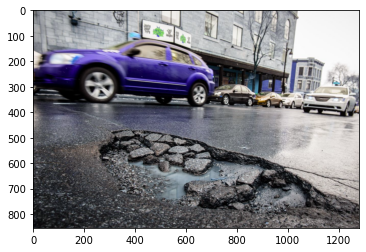

In [58]:
test_img = 'pothole_dataset/potholes/184.jpg'  # another_images/normal/1.jpg 는 pothole으로 인식 (터널 입구)
test_image = image.load_img(test_img, target_size = (64, 64))

plt.imshow(cv2.imread(test_img)) # test img 출력

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'pothole'
else:
    prediction = 'normal'
    
print(prediction)